# <center>Machine Learning in Python</center> 

Mount your Google drive by using this code snippet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


check current directory contents

In [3]:
!ls '/content/drive/My Drive/Workshop-Python/'

classification_using_NN_cats-vs-dogs.ipynb
classification_using_NN_MNIST.ipynb
dataset
keras_basics_notebook.ipynb
regression_using_NN_boston-housing.ipynb
working_with_google_colab.ipynb


**Neural Network in Keras**
In this excercise, we will learn to: 
1. import MNIST dataset and visualize some example images
2. define the neural network model with a single hidden layer
3. train the model and plot the accuracy and loss at each epoch
4. test the model
6. save the model after every 10 epochs

## 1. Import MNIST dataset

In [2]:
from keras.datasets import mnist
import numpy as np
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
_, img_rows, img_cols =  train_X.shape
num_classes = len(np.unique(train_Y))
num_input_nodes = img_rows*img_cols
print("Number of training images: %d"%train_X.shape[0])
print("Number of test images: %d"%train_X.shape[0])
print("Image rows: %d"%train_X.shape[1])
print("Image columns: %d"%train_X.shape[2])
print("Number of classes: %d"%num_classes)
print("Training data shape: ", train_X.shape, train_Y.shape)
print("Testing data shape: ", test_X.shape, test_Y.shape)

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
Number of training images: 60000
Number of test images: 60000
Image rows: 28
Image columns: 28
Number of classes: 10
Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


### Visualize some examples from dataset

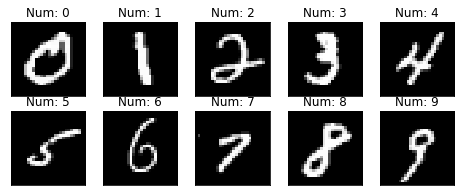

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,3)) # size of figure in inches (1 inch = 96 pixels)
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[]) # add_subplot(rows,cols,position,labels on x and y axis)
    X_idx = train_X[train_Y[:]==i,:]   
    ax.set_title("Num: " + str(i)) # plot first image of certain class (label)
    plt.imshow(X_idx[1], cmap="gray") #color map gray 
plt.show()

### Pre-processing the dataset

In [5]:
import keras
# reshape images to column vectors
train_X = train_X.reshape(train_X.shape[0], img_rows*img_cols)
test_X = test_X.reshape(test_X.shape[0], img_rows*img_cols)
# convert class labels to binary class labels
train_Y = keras.utils.np_utils.to_categorical(train_Y, num_classes)
test_Y = keras.utils.np_utils.to_categorical(test_Y, num_classes)
print("train_X:",train_X.shape)
print("test_X:",test_X.shape)
print("train_Y:",train_Y.shape)
print("test_Y:",test_Y.shape)

train_X: (60000, 784)
test_X: (10000, 784)
train_Y: (60000, 10)
test_Y: (10000, 10)


# 2. Define model

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

def nn():
    # initialize model
    model = Sequential()
    # add an input layer and a hidden layer with sigmoid activation 
    model.add(Dense(100, input_dim = num_input_nodes, activation='sigmoid'))
    # add output layer with activation
    model.add(Dense(num_classes, activation='softmax'))
    return model

# define model
model = nn()
# define optimizer
sgd = SGD(lr=0.01) # check with different lr values
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# print model information
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 3. Train the model

In [7]:
import time
start = time.time()
model_info = model.fit(train_X, train_Y, batch_size=16, epochs=10, verbose=2, validation_split=0.2)
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))




Train on 48000 samples, validate on 12000 samples
Epoch 1/10





 - 16s - loss: 0.0697 - acc: 0.4713 - val_loss: 0.0513 - val_acc: 0.7047
Epoch 2/10
 - 7s - loss: 0.0431 - acc: 0.7570 - val_loss: 0.0344 - val_acc: 0.8215
Epoch 3/10
 - 7s - loss: 0.0322 - acc: 0.8222 - val_loss: 0.0272 - val_acc: 0.8542
Epoch 4/10
 - 7s - loss: 0.0267 - acc: 0.8518 - val_loss: 0.0233 - val_acc: 0.8722
Epoch 5/10
 - 7s - loss: 0.0235 - acc: 0.8694 - val_loss: 0.0209 - val_acc: 0.8825
Epoch 6/10
 - 7s - loss: 0.0214 - acc: 0.8789 - val_loss: 0.0194 - val_acc: 0.8898
Epoch 7/10
 - 7s - loss: 0.0197 - acc: 0.8880 - val_loss: 0.0181 - val_acc: 0.8938
Epoch 8/10
 - 7s - loss: 0.0184 - acc: 0.8936 - val_loss: 0.0171 - val_acc: 0.8997
Epoch 9/10
 - 7s - loss: 0.0173 - acc: 0.9000 - val_loss: 0.0165 - val_acc: 0.9022
Epoch 10/10
 - 7s - loss: 0.0166 - acc: 0.9036 - val_loss: 0.0158 - val_acc: 0.9064
Model took 76.11 seconds to train


**Visualize accuracy and loss plots over training epochs**

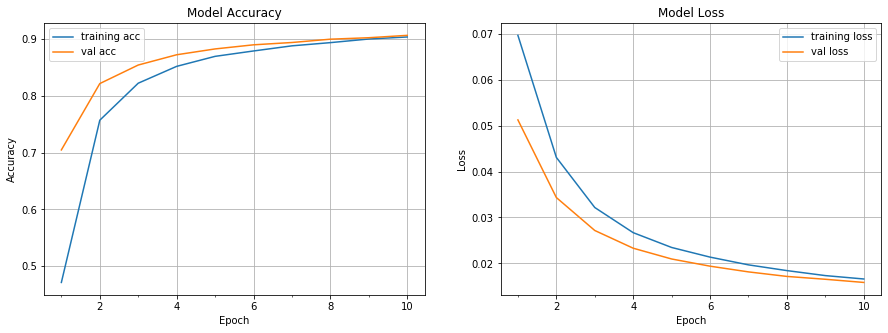

In [9]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # model history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['training acc', 'val acc'], loc='best')
    axs[0].grid(True)
    # model history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['training loss', 'val loss'], loc='best')
    axs[1].grid(True)
plot_model_history(model_info)

## 5. Test the model

In [10]:
def accuracy(test_X, test_Y, model):
    result = model.predict(test_X) # will give you (N,10) matrix, in each row we have probabilities of a neuron
    predicted_class = np.argmax(result, axis=1) # returns the indices of the maximum index along 1 axis
    true_class = np.argmax(test_Y, axis=1) # returns the indices of the maximum index along 1 axis
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

print("Accuracy on test data is: %0.2f"%accuracy(test_X, test_Y, model))

Accuracy on test data is: 90.41


## 5. Save the model after every 10 epochs

In [0]:
from keras.callbacks import ModelCheckpoint
import os

# define a deep neural network
model = nn()
# define optimizer
sgd = SGD(lr=0.1)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
# checkpoint
outputFolder = 'weights/'
if not os.path.exists(outputFolder):
    os.makedirs(outputFolder)

filepath=outputFolder+"/weights-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, \
                             save_best_only=False, save_weights_only=True, \
                             mode='auto', period=10)
callbacks_list = [checkpoint]

# train the model
model_info = model.fit(train_X, train_Y, batch_size=128, \
                       epochs=80, callbacks=callbacks_list, verbose=0, \
                       validation_split=0.2)
# compute test accuracy
print("Accuracy on test data is: %0.2f"%accuracy(test_X, test_Y, model))